# Preprocessing data in MNE-Python

`
Authors:
Marijn van Vliet, Britta Westner, Alexandre Gramfort, Denis A. Engemann
`

## Setup

We start out with loading the packages we need. These include `matplotlib` for plotting, `os` for path management, `numpy` for numerical computations, and of course `mne`.
We also use matplotlib magic to ask for figure to be plotted inline. 

In [1]:
# This makes figures appear inside the notebook instead of in a new window.
%matplotlib inline

# These are the Python packages we will use in this notebook.
import numpy as np  # for numerical computations
import matplotlib.pyplot as plt  # for making custom figures
import mne  # for MEG and EEG data analysis

Let's double check your MNE-Python version. This should give back `1.10.1` or higher.

In [2]:
mne.__version__

'1.11.0.dev173+gbf0ec5b17'

We set the log-level of MNE-Python to 'warning' so the output is less verbose:

In [3]:
mne.set_log_level('warning')

### Help!

Remember, if you need help just ask ... the machine!
Let's see how to get the docstring information for a function - here, the function [`mne.pick_types`](https://mne.tools/stable/generated/mne.pick_types.html).

In [4]:
mne.pick_types?

Signature:
mne.pick_types(
    info,
    meg=False,
    eeg=False,
    stim=False,
    eog=False,
    ecg=False,
    emg=False,
    ref_meg='auto',
    *,
    misc=False,
    resp=False,
    chpi=False,
    exci=False,
    ias=False,
    syst=False,
    seeg=False,
    dipole=False,
    gof=False,
    bio=False,
    ecog=False,
    fnirs=False,
    csd=False,
    dbs=False,
    temperature=False,
    gsr=False,
    eyetrack=False,
    include=(),
    exclude='bads',
    selection=None,
)
Docstring:
Pick channels by type and names.

Parameters
----------

info : mne.Info
    The :class:`mne.Info` object with information about the sensors and methods of measurement.

meg : bool | str
    If True include MEG channels. If string it can be 'mag', 'grad',
    'planar1' or 'planar2' to select only magnetometers, all
    gradiometers, or a specific type of gradiometer.
eeg : bool
    If True include EEG channels.
stim : bool
    If True include stimulus channels.
eog : bool
    If True include

## Set the path to the data

You should have downloaded the `ds000117-practical` folder. We have to let Python know, where to find this folder on your disk. You will have to adjust the path below to reflect your computer and path structure!
You can print the whole path and check the directory to double check it's correct.

In [5]:
# Change the following path to where the folder ds000117 is on your disk.
data_path = "./ds000117_pruned"  # `./` means the folder of this notebook

# Based on the `data_path` you specified above, this is where the raw MEG+EEG data should be.
raw_fname = f"{data_path}/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif"
print(raw_fname)

./ds000117_pruned/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif


Take a moment to check if the filename given by the previous cell is correct. Make sure there are no typos!

## Access and read the raw data

MNE-Python supports a wide range of file formats.

In [6]:
# List all the various read functions inside mne.io.
for read_function in dir(mne.io):
    if read_function.startswith("read_raw"):
        print(read_function)

read_raw
read_raw_ant
read_raw_artemis123
read_raw_bdf
read_raw_boxy
read_raw_brainvision
read_raw_bti
read_raw_cnt
read_raw_ctf
read_raw_curry
read_raw_edf
read_raw_eeglab
read_raw_egi
read_raw_eximia
read_raw_eyelink
read_raw_fieldtrip
read_raw_fif
read_raw_fil
read_raw_gdf
read_raw_hitachi
read_raw_kit
read_raw_nedf
read_raw_neuralynx
read_raw_nicolet
read_raw_nihon
read_raw_nirx
read_raw_nsx
read_raw_persyst
read_raw_snirf


In [7]:
mne.io.read_raw?

Signature: mne.io.read_raw(fname, *, preload=False, verbose=None, **kwargs) -> mne.io.base.BaseRaw
Docstring:
Read raw file.

This function is a convenient wrapper for readers defined in `mne.io`. The
correct reader is automatically selected based on the detected file format.
All function arguments are passed to the respective reader.

The following readers are currently supported:

* `~mne.io.read_raw_ant`
* `~mne.io.read_raw_artemis123`
* `~mne.io.read_raw_bdf`
* `~mne.io.read_raw_boxy`
* `~mne.io.read_raw_brainvision`
* `~mne.io.read_raw_cnt`
* `~mne.io.read_raw_ctf`
* `~mne.io.read_raw_curry`
* `~mne.io.read_raw_edf`
* `~mne.io.read_raw_eeglab`
* `~mne.io.read_raw_egi`
* `~mne.io.read_raw_eximia`
* `~mne.io.read_raw_eyelink`
* `~mne.io.read_raw_fieldtrip`
* `~mne.io.read_raw_fif`
* `~mne.io.read_raw_fil`
* `~mne.io.read_raw_gdf`
* `~mne.io.read_raw_kit`
* `~mne.io.read_raw_nedf`
* `~mne.io.read_raw_nicolet`
* `~mne.io.read_raw_nihon`
* `~mne.io.read_raw_nirx`
* `~mne.io.read_raw_ns

In [8]:
raw = mne.io.read_raw(raw_fname, preload=False)
print(raw)

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 404 x 540100 (491.0 s), ~6.9 MiB, data not loaded>


In [9]:
raw

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 404 x 540100 (491.0 s), ~6.9 MiB, data not loaded>

For general info on importing data you can check:
- for MEG: https://mne.tools/stable/auto_tutorials/io/plot_10_reading_meg_data.html
- for EEG: https://mne.tools/stable/auto_tutorials/io/plot_20_reading_eeg_data.html

## Understand your data file


Now let's look at the measurement info. It can give details about:

   - sampling rate
   - filtering parameters
   - available channel types
   - bad channels
   - etc.

In [10]:
print(raw.info)

<Info | 23 non-empty values
 acq_pars: ACQch001 110113 ACQch002 110112 ACQch003 110111 ACQch004 110122 ...
 bads: []
 ch_names: MEG0113, MEG0112, MEG0111, MEG0122, MEG0123, MEG0121, MEG0132, ...
 chs: 204 Gradiometers, 102 Magnetometers, 74 EEG, 3 Stimulus, 12 misc, 9 Continuous head position indicator (HPI) coil channels
 custom_ref_applied: False
 description: (meg) Vectorview system at Cambridge
 dev_head_t: MEG device -> head transform
 dig: 137 items (3 Cardinal, 5 HPI, 75 EEG, 54 Extra)
 events: 1 item (list)
 experimenter: MEG
 file_id: 4 items (dict)
 highpass: 0.0 Hz
 hpi_meas: 1 item (list)
 hpi_results: 1 item (list)
 hpi_subsystem: 2 items (dict)
 line_freq: 50.0
 lowpass: 356.4 Hz
 meas_date: 1941-03-22 11:04:14 UTC
 meas_id: 4 items (dict)
 nchan: 404
 proc_history: 1 item (list)
 proj_id: 47
 proj_name: dgw_studies
 projs: []
 sfreq: 1100.0 Hz
 subject_info: <subject_info | id: 813, birthday: 1978-01-01>
>


<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>How many channels do you have for each type of sensors?</li>
    <li>What is the sampling frequency?</li>
    <li>Have the data been filtered?</li>
    <li>What is the frequency of the line noise?</li>
    <li>Is there any bad channel?</li>
    </ul>
</div>

## A closer look at the info dictionary

[`raw.info`](https://mne.tools/stable/generated/mne.Info.html) is just a dictionary:

In [11]:
isinstance(raw.info, dict)

True

So we can access its elements this way:

In [12]:
raw.info["sfreq"]  # Sampling frequency

1100.0

In [13]:
raw.info["bads"]  # list of marked bad channels

[]

In [14]:
raw.info["line_freq"]

50.0

## A closer look at the channels
Next let's see what channels are present. It is available via the `raw.ch_names` attribute.

In [15]:
type(raw.ch_names)

list

In [16]:
raw.ch_names[:10]  # this prints the first ten channels

['MEG0113',
 'MEG0112',
 'MEG0111',
 'MEG0122',
 'MEG0123',
 'MEG0121',
 'MEG0132',
 'MEG0133',
 'MEG0131',
 'MEG0143']

You can index it as a list

In [17]:
raw.ch_names[42]

'MEG0432'

We can also query the channel type of a specific channel:

In [18]:
channel_type = mne.channel_type(raw.info, 75)
print(f"Channel #75 is of type: {channel_type}")  # print this out in a neat way

channel_type = mne.channel_type(raw.info, 320)
print(f"Channel #320 is of type: {channel_type}")

Channel #75 is of type: grad
Channel #320 is of type: eeg


The info also contains all the details about the sensors (type, locations, coordinate frame etc.) in `raw.info["chs"]`:

In [19]:
len(raw.info["chs"])

404

In [20]:
type(raw.info["chs"])

list

In [21]:
raw.info["chs"][0]  # check the first channel

{'scanno': 1,
 'logno': 113,
 'kind': 1 (FIFFV_MEG_CH),
 'range': 1.9073486328125e-05,
 'cal': 3.250000046861601e-09,
 'coil_type': 3012 (FIFFV_COIL_VV_PLANAR_T1),
 'loc': array([-0.1066    ,  0.0464    , -0.0604    , -0.01532829,  0.00619847,
        -0.99986327, -0.18597366, -0.98255992, -0.00331254, -0.98243302,
         0.185894  ,  0.016216  ]),
 'unit': 201 (FIFF_UNIT_T_M),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'MEG0113',
 'coord_frame': 1 (FIFFV_COORD_DEVICE)}

In [22]:
raw.info["chs"][330]

{'scanno': 331,
 'logno': 25,
 'kind': 2 (FIFFV_EEG_CH),
 'range': 0.00030517578125,
 'cal': 0.00019999999494757503,
 'coil_type': 1 (FIFFV_COIL_EEG),
 'loc': array([ 5.63842431e-02,  3.68367434e-02,  9.40217227e-02,  8.26010015e-04,
         1.14762366e-01, -2.10680366e-02,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  1.00000000e+00]),
 'unit': 107 (FIFF_UNIT_V),
 'unit_mul': 0 (FIFF_UNITM_NONE),
 'ch_name': 'EEG025',
 'coord_frame': 4 (FIFFV_COORD_HEAD)}

Now that we know that there are EEG and MEG channels in the data, we can plot both separately:

In [23]:
raw.plot_sensors?

Signature:
raw.plot_sensors(
    kind='topomap',
    ch_type=None,
    title=None,
    show_names=False,
    ch_groups=None,
    to_sphere=True,
    axes=None,
    block=False,
    show=True,
    sphere=None,
    *,
    verbose=None,
)
Docstring:
Plot sensor positions.

Parameters
----------
kind : str
    Whether to plot the sensors as 3d, topomap or as an interactive
    sensor selection dialog. Available options 'topomap', '3d',
    'select'. If 'select', a set of channels can be selected
    interactively by using lasso selector or clicking while holding
    control key. The selected channels are returned along with the
    figure instance. Defaults to 'topomap'.
ch_type : None | str
    The channel type to plot. Available options ``'mag'``, ``'grad'``,
    ``'eeg'``, ``'seeg'``, ``'dbs'``, ``'ecog'``, ``'all'``. If ``'all'``, all
    the available mag, grad, eeg, seeg, dbs, and ecog channels are plotted. If
    None (default), then channels are chosen in the order given above.
tit

/tmp/ipykernel_1620364/1112659475.py:1: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  raw.plot_sensors(ch_type="grad");


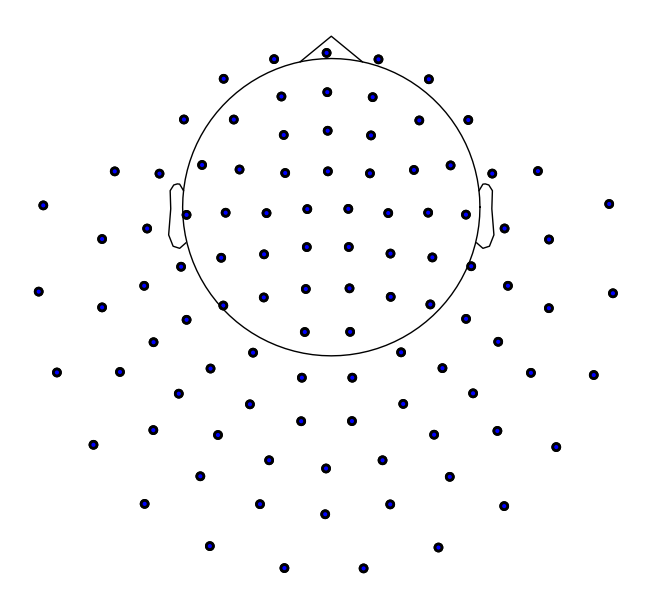

In [24]:
raw.plot_sensors(ch_type="grad");

In this data, the position of EEG sensors was digitized with a 3D pen. In this case, in order to get the best looking figure, we will first fit a sphere to the digitized points. This is not necessary in cases where the EEG electrodes follow a standard positioning system.

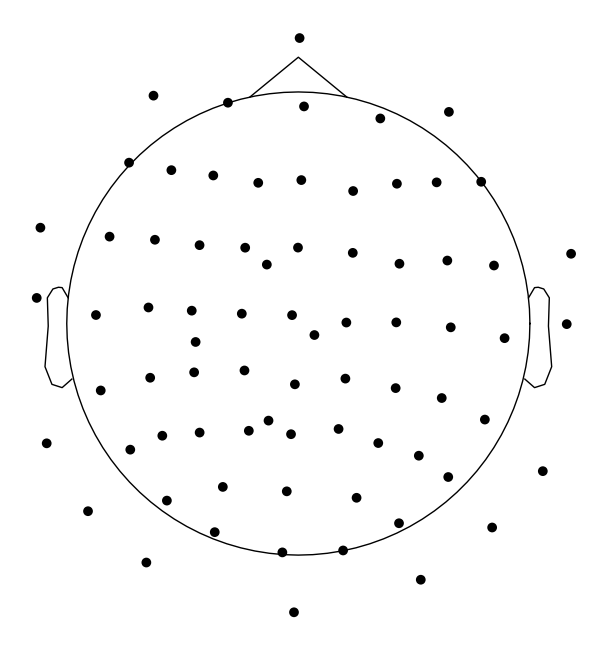

In [25]:
radius, center, _ = mne.bem.fit_sphere_to_headshape(raw.info, dig_kinds="eeg")
sphere = tuple(center) + (radius,)

raw.plot_sensors(ch_type="eeg", sphere=sphere);

## Setting channel types and re-referencing

Some channels are wrongly defined as EEG in the file. 
Two of these are EOG (EEG061 and EEG062) and EEG063 is actually an ECG channel. EEG064 was recording but not connected to anything, so we'll make it `"misc"` instead. 
We will now set the channel types for those wrongly classified channels. This will be useful for automatic artifact rejection.

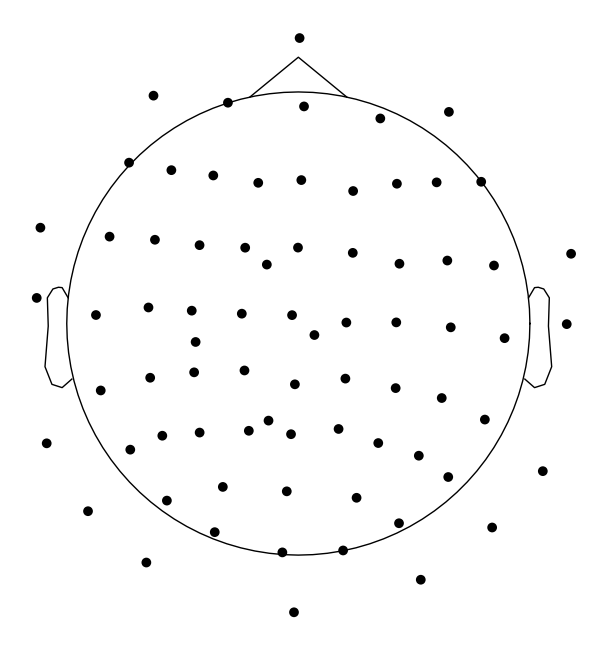

In [26]:
# Fit a sphere to the digitized EEG locations.
radius, rr, _ = mne.bem.fit_sphere_to_headshape(raw.info, "eeg")
sphere = (rr[0], rr[1], rr[2], radius)  # format that `raw.plot_sensors` wants

# Plot the EEG sensor locations
raw.plot_sensors(ch_type='eeg', sphere=sphere);

In [27]:
raw.set_channel_types?

Signature: raw.set_channel_types(mapping, *, on_unit_change='warn', verbose=None)
Docstring:
Specify the sensor types of channels.

Parameters
----------
mapping : dict
    A dictionary mapping channel names to sensor types, e.g.,
    ``{'EEG061': 'eog'}``.
on_unit_change : ``'raise'`` | ``'warn'`` | ``'ignore'``
    What to do if the measurement unit of a channel is changed
    automatically to match the new sensor type.

    .. versionadded:: 1.4

verbose : bool | str | int | None
    Control verbosity of the logging output. If ``None``, use the default
    verbosity level. See the :ref:`logging documentation <tut-logging>` and
    :func:`mne.verbose` for details. Should only be passed as a keyword
    argument.

Returns
-------
inst : instance of Raw | Epochs | Evoked
    The instance (modified in place).

    .. versionchanged:: 0.20
       Return the instance.

Notes
-----
The following :term:`sensor types` are accepted:

    bio, chpi, csd, dbs, dipole, ecg, ecog, eeg, emg, eog, 

In [28]:
raw.set_channel_types({"EEG061": "eog",  # actually EOG not EEG
                       "EEG062": "eog",  # actually EOG not EEG
                       "EEG063": "ecg",  # actually ECG not EEG
                       "EEG064": "misc"})  # EEG064 free-floating electrode

# we also rename the EOG and ECG channels:
raw.rename_channels({"EEG061": "EOG061",
                     "EEG062": "EOG062",
                     "EEG063": "ECG063"})

/tmp/ipykernel_1620364/1754767804.py:1: RuntimeWarning: The unit for channel(s) EEG064 has changed from V to NA.
  raw.set_channel_types({"EEG061": "eog",  # actually EOG not EEG


<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 404 x 540100 (491.0 s), ~6.9 MiB, data not loaded>

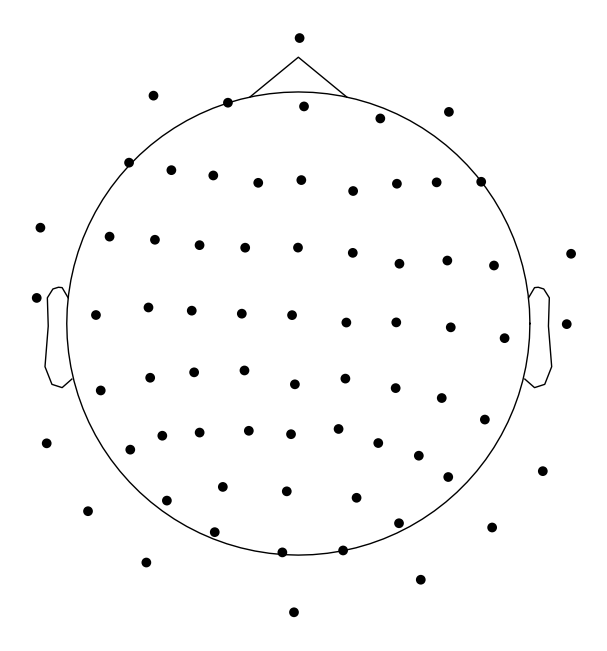

In [29]:
raw.plot_sensors(kind='topomap', ch_type='eeg', sphere=sphere);

After we have fixed the channels, we can now compute an average reference for the EEG. 

In [30]:
# For setting the reference, we have to load the data into memory:
raw.load_data()
print(raw.info['custom_ref_applied'])  # let's see if there is a reference applied

0 (FIFFV_MNE_CUSTOM_REF_OFF)


In [31]:
# now let's re-reference
raw.set_eeg_reference(ref_channels='average', projection=False)
print(raw.info['projs'])  # not added as a projection
print(raw.info['custom_ref_applied'])

[]
1 (FIFFV_MNE_CUSTOM_REF_ON)


## Accessing the data

To access the data just use the `[]` syntax as to access any element of a list, dict etc. Note that `raw[]` returns two things: the data and the times array.

In [32]:
start, stop = 0, 10
data, times = raw[:, start:stop]  # fetch all channels and the first 10 time points
print(data.shape)
print(times.shape)

(404, 10)
(10,)


In [33]:
times  # always starts at 0 by convention

array([0.        , 0.00090909, 0.00181818, 0.00272727, 0.00363636,
       0.00454545, 0.00545455, 0.00636364, 0.00727273, 0.00818182])

## Resampling the data

We will now change the sampling frequency of the data to speed up the computations.

In [34]:
raw.load_data()  # load data into memory
raw.resample(300)

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 404 x 147300 (491.0 s), ~460.9 MiB, data loaded>

And let's remove unecessary channels - some empty stimulus channels, misc. channels, and HPI channels.

In [35]:
raw.drop_channels?

Signature: raw.drop_channels(ch_names, on_missing='raise')
Docstring:
Drop channel(s).

Parameters
----------
ch_names : iterable or str
    Iterable (e.g. list) of channel name(s) or channel name to remove.

on_missing : 'raise' | 'warn' | 'ignore'
    Can be ``'raise'`` (default) to raise an error, ``'warn'`` to emit a
    warning, or ``'ignore'`` to ignore when entries in ch_names are not present in the raw instance.

    .. versionadded:: 0.23.0

Returns
-------
inst : instance of Raw, Epochs, or Evoked
    The modified instance.

See Also
--------
reorder_channels
pick_channels
pick_types

Notes
-----
.. versionadded:: 0.9.0
File:      ~/projects/mne-python/mne/channels/channels.py
Type:      method

In [36]:
to_drop = ["STI201", "STI301", "MISC201", "MISC202", "MISC203",
           "MISC204", "MISC205", "MISC206", "MISC301", "MISC302",
           "MISC303", "MISC304", "MISC305", "MISC306", "CHPI001",
           "CHPI002", "CHPI003", "CHPI004", "CHPI005", "CHPI006",
           "CHPI007", "CHPI008", "CHPI009"]

In [37]:
raw.drop_channels(to_drop)

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 381 x 147300 (491.0 s), ~435.1 MiB, data loaded>

## Filtering the data and plotting raw data

We want to filter the data between 0 and 40 Hz using a linear-phase finite-impulse response (FIR) filter.

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li>Which parameters do we have to set to achieve this, based on the docstring of the `filter` method?</li>
    </ul>
</div>


In [38]:
raw.filter?

Signature:
raw.filter(
    l_freq,
    h_freq,
    picks=None,
    filter_length='auto',
    l_trans_bandwidth='auto',
    h_trans_bandwidth='auto',
    n_jobs=None,
    method='fir',
    iir_params=None,
    phase='zero',
    fir_window='hamming',
    fir_design='firwin',
    skip_by_annotation=('edge', 'bad_acq_skip'),
    pad='reflect_limited',
    verbose=None,
)
Docstring:
Filter a subset of channels/vertices.

Parameters
----------

l_freq : float | None
    For FIR filters, the lower pass-band edge; for IIR filters, the lower
    cutoff frequency. If None the data are only low-passed.

h_freq : float | None
    For FIR filters, the upper pass-band edge; for IIR filters, the upper
    cutoff frequency. If None the data are only high-passed.
picks : str | array-like | slice | None
    Channels to include. Slices and lists of integers will be interpreted as 
    channel indices. In lists, channel *type* strings (e.g., ``['meg', 
    'eeg']``) will pick channels of those types, chan

To see what effect filtering has for our data, let's quickly look at our data first! For full functionality, we ask matplotlib to show the plot in a separate window.

In [39]:
# Tell MNE-Python to use the fast QT data browser (should be the default)
%matplotlib qt
mne.viz.set_browser_backend("qt")

raw.plot()

In [40]:
raw.filter(0, 40)

<Raw | sub-01_ses-meg_task-facerecognition_run-01_proc-sss_meg.fif, 381 x 147300 (491.0 s), ~435.1 MiB, data loaded>

Now that we filtered our data, let's look at it again. Can you spot the difference?

In [41]:
raw.plot()

<div class="alert alert-success">
    <b>EXERCISE</b>:
     <ul>
      <li> Which data changed more due to the filtering: EEG or MEG?</li>
      <li> Can you find reasons why?</li>
      <li>  Do you see any bad channels?</li>
      <li>  Is there any characteristics you can see in the data?</li>
       </ul>
</div>

For more information on visualizing of raw data, see here: 
https://mne.tools/0.16/auto_tutorials/plot_visualize_raw.html


## Look at the event structure of the data

The data has different events, which mark which stimulus was shown to the participants. The event/trigger structure is as follows:
- 5, 6, 7: famous faces
- 13, 14, 15: unfamiliar faces
- 17, 18, 19: scrambled faces

We first look at which events are there:

In [42]:
events = mne.find_events(raw, stim_channel='STI101', verbose=True)

Finding events on: STI101
259 events found on stim channel STI101
Event IDs: [   5    6    7   13   14   15   17   18   19  256  261  262  263  269
  270  271  273  274  275 4096 4101 4102 4103 4109 4110 4111 4113 4114
 4115 4352]


<div class="alert alert-success">
    <b>Exercise</b>:
     <ul>
    <li>What is the type of the variable events?</li>
    <li>What is the meaning of the 3 columns of events?</li>
    <li>How many events of the value 5 are there?
    </ul>
</div>

 

Let's visualize the paradigm:

In [43]:
events = events[events[:, 2] < 20]  # take only events with code less than 20

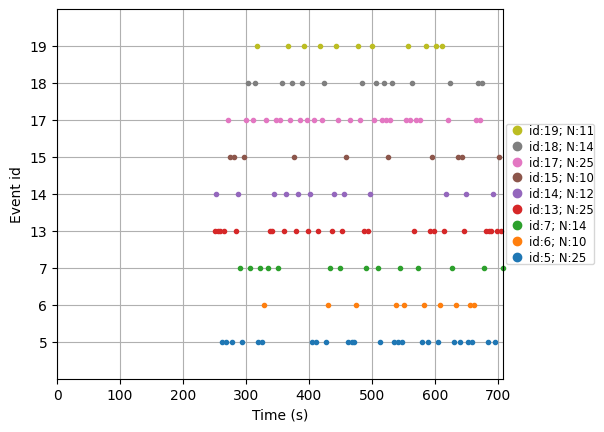

In [44]:
%matplotlib inline

mne.viz.plot_events(events, raw.info["sfreq"]);

For event trigger and conditions we use a Python dictionary with keys that contain "/" for grouping sub-conditions

In [45]:
event_id = {
    "face/famous/first": 5,
    "face/famous/immediate": 6,
    "face/famous/long": 7,
    "face/unfamiliar/first": 13,
    "face/unfamiliar/immediate": 14,
    "face/unfamiliar/long": 15,
    "scrambled/first": 17,
    "scrambled/immediate": 18,
    "scrambled/long": 19,
}

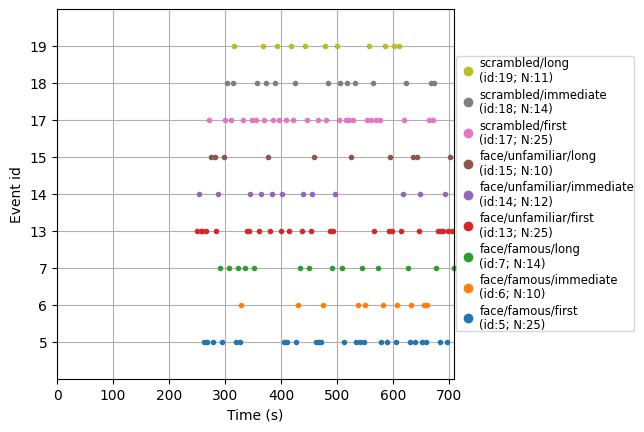

In [46]:
mne.viz.plot_events(events, sfreq=raw.info["sfreq"], event_id=event_id);

We can now re-visit our raw data plot:

In [47]:
%matplotlib qt

raw.plot(event_id=event_id, events=events);

## Epoch data and artifact rejection

Define epochs parameters:

In [48]:
tmin = -0.5  # start of each epoch (500ms before the trigger)
tmax = 2.0  # end of each epoch (2000ms after the trigger)

Define the baseline period:

In [49]:
baseline = (-0.2, 0)  # means from 200ms before to stim onset (t = 0)

We also pick channels now - MEG, EEG and EOG channels

In [50]:
picks = mne.pick_types(raw.info, meg=True, eeg=True, eog=True,
                       stim=False, exclude='bads')

The easiest (and maybe also most dangerous?) way to clean your data is to define peak-to-peak (amplitude range) rejection parameters for gradiometers, magnetometers and EOG.

<div class="alert alert-info">
    <b>REMARK</b>:
     <ul>
    <li>The <a href="https://autoreject.github.io/">autoreject project</a> aims to solve this problem of reject parameter setting. See the <a href="https://www.sciencedirect.com/science/article/pii/S1053811917305013">paper</a> for more info.</li>
    </ul>
</div>

In [51]:
reject = dict(grad=4000e-13, mag=4e-12, eog=150e-6)  # this can be highly data dependent

Now we can put all of this together and create epochs:

In [52]:
epochs = mne.Epochs(raw, events, event_id, tmin, tmax, proj=True,
                    picks=picks, baseline=baseline,
                    reject=reject)

In [53]:
print(epochs)  # let's look at some details about the epochs object

<Epochs | 146 events (good & bad), -0.5 – 2 s (baseline -0.2 – 0 s), ~6.9 MiB, data not loaded,
 'face/famous/first': 25
 'face/famous/immediate': 10
 'face/famous/long': 14
 'face/unfamiliar/first': 25
 'face/unfamiliar/immediate': 12
 'face/unfamiliar/long': 10
 'scrambled/first': 25
 'scrambled/immediate': 14
 'scrambled/long': 11>


Let's explicitly drop the epochs we identified as _bad_ through the thresholds we identified above:

In [54]:
epochs.drop_bad()  # remove bad epochs based on reject

<Epochs | 79 events (all good), -0.5 – 2 s (baseline -0.2 – 0 s), ~6.9 MiB, data not loaded,
 'face/famous/first': 13
 'face/famous/immediate': 3
 'face/famous/long': 6
 'face/unfamiliar/first': 17
 'face/unfamiliar/immediate': 4
 'face/unfamiliar/long': 6
 'scrambled/first': 15
 'scrambled/immediate': 9
 'scrambled/long': 6>

In [55]:
epochs.load_data()  # load data in memory

<Epochs | 79 events (all good), -0.5 – 2 s (baseline -0.2 – 0 s), ~178.0 MiB, data loaded,
 'face/famous/first': 13
 'face/famous/immediate': 3
 'face/famous/long': 6
 'face/unfamiliar/first': 17
 'face/unfamiliar/immediate': 4
 'face/unfamiliar/long': 6
 'scrambled/first': 15
 'scrambled/immediate': 9
 'scrambled/long': 6>

## Accounting for projector delay

During stimulus presentation, there was a delay of 34.5 ms between the event marker and the projector actually showing the image.
We need to correct the events accordingly.

In [56]:
epochs.shift_time(0.034)

<Epochs | 79 events (all good), -0.466 – 2.034 s (baseline -0.2 – 0 s), ~178.0 MiB, data loaded,
 'face/famous/first': 13
 'face/famous/immediate': 3
 'face/famous/long': 6
 'face/unfamiliar/first': 17
 'face/unfamiliar/immediate': 4
 'face/unfamiliar/long': 6
 'scrambled/first': 15
 'scrambled/immediate': 9
 'scrambled/long': 6>

## A closer look at artifact rejection


First, let's have a closer look at the methods of the epochs object.
Uncomment the line below and hit ``epochs.<TAB>``

In [57]:
#epochs.

See how epochs were dropped

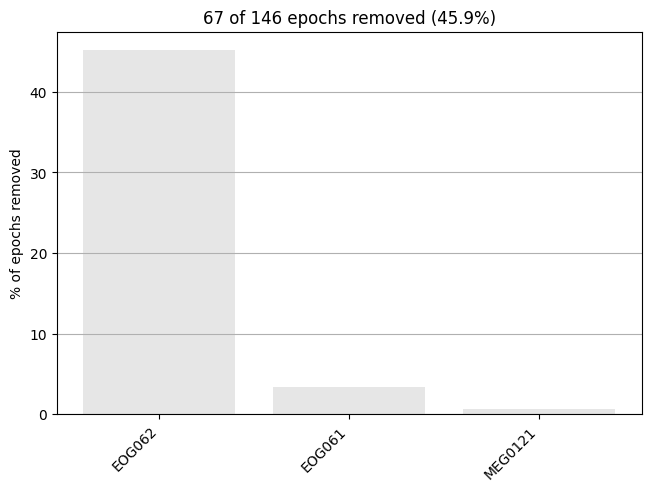

In [58]:
%matplotlib inline

epochs.plot_drop_log();

### Wait a second, did we just loose half of our epochs due to EOG???

We can probably do better. Let's use indepandent component analysis (ICA) to remove components related to EOG and other offenders, ie., ECG.

Here is the workflow, we'll first detect EOG artifacts and visualize their impact. Then we'll use ICA to mitigate these artifacts.

In [59]:
raw_highpass = raw.copy().filter(1, None)

In [60]:
mne.viz.plot_evoked_joint?

Signature:
mne.viz.plot_evoked_joint(
    evoked,
    times='peaks',
    title='',
    picks=None,
    exclude='bads',
    show=True,
    ts_args=None,
    topomap_args=None,
)
Docstring:
Plot evoked data as butterfly plot and add topomaps for time points.

.. note:: Axes to plot in can be passed by the user through ``ts_args`` or
          ``topomap_args``. In that case both ``ts_args`` and
          ``topomap_args`` axes have to be used. Be aware that when the
          axes are provided, their position may be slightly modified.

Parameters
----------
evoked : instance of Evoked
    The evoked instance.
times : float | array of float | "auto" | "peaks"
    The time point(s) to plot. If ``"auto"``, 5 evenly spaced topographies
    between the first and last time instant will be shown. If ``"peaks"``,
    finds time points automatically by checking for 3 local maxima in
    Global Field Power. Defaults to ``"peaks"``.
title : str | None
    The title. If ``None``, suppress printing cha

/tmp/ipykernel_1620364/2827245563.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint(topomap_args=dict(sphere=sphere));


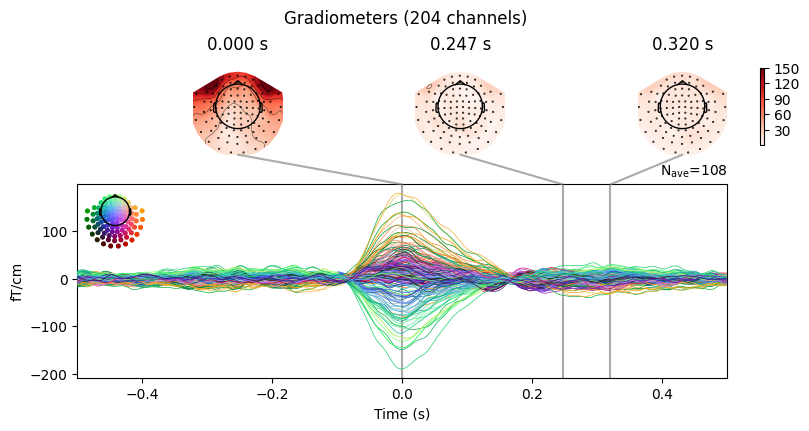

/tmp/ipykernel_1620364/2827245563.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint(topomap_args=dict(sphere=sphere));


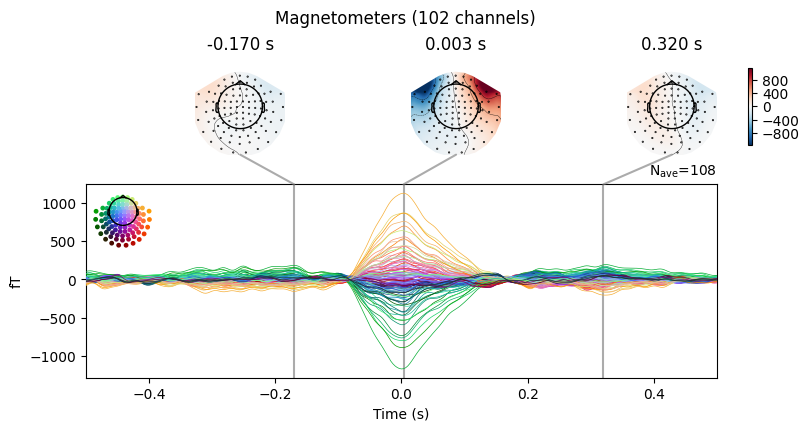

/tmp/ipykernel_1620364/2827245563.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint(topomap_args=dict(sphere=sphere));
/tmp/ipykernel_1620364/2827245563.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  eog_epochs.average().plot_joint(topomap_args=dict(sphere=sphere));


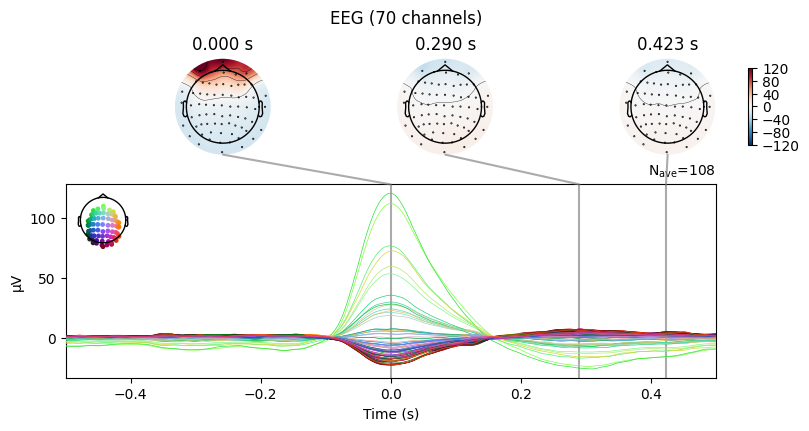

In [61]:
# There is a function to create EOG epochs:
eog_epochs = mne.preprocessing.create_eog_epochs(raw_highpass)
eog_epochs.average().plot_joint(topomap_args=dict(sphere=sphere));

Let's see where those EOG segments show up in our raw data:

In [62]:
%matplotlib qt
raw.plot(events=eog_epochs.events);

Let's perform ICA on the raw data. It needs data that is well-centered on 0, so we high-pass first.
To speed things up, only fit enough components to explain 95% of the data.

/tmp/ipykernel_1620364/4254960686.py:4: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ica.plot_components()


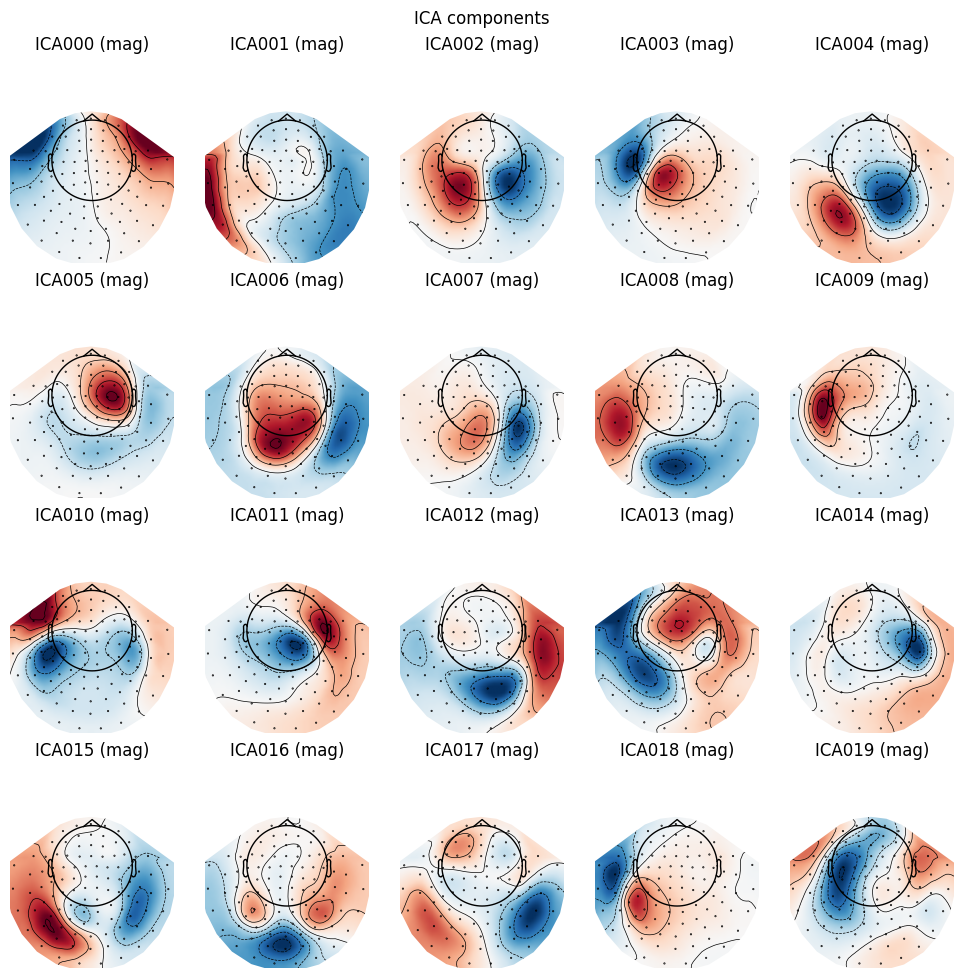

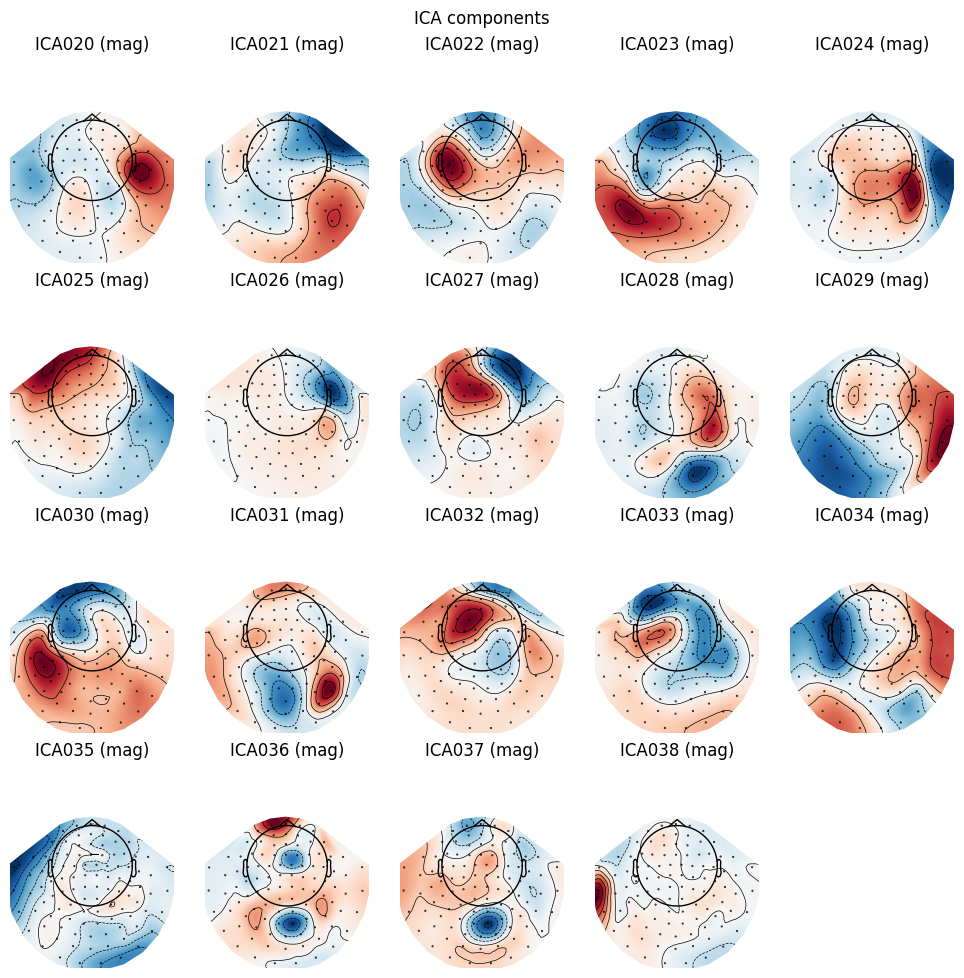

[<MNEFigure size 975x967 with 20 Axes>, <MNEFigure size 975x967 with 19 Axes>]

In [63]:
ica = mne.preprocessing.ICA(0.95).fit(raw_highpass)

%matplotlib inline
ica.plot_components()

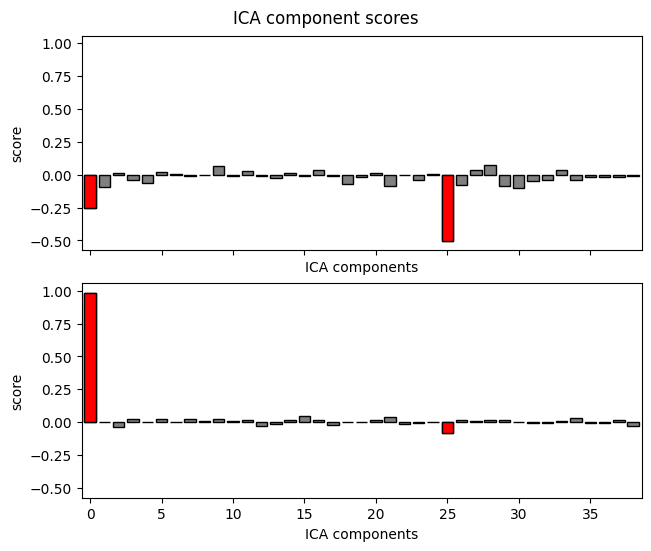

In [64]:
bads_eog, eog_scores = ica.find_bads_eog(raw_highpass)
ica.plot_scores(eog_scores, bads_eog);

/tmp/ipykernel_1620364/4267846982.py:1: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ica.plot_properties(eog_epochs, bads_eog);
/tmp/ipykernel_1620364/4267846982.py:1: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ica.plot_properties(eog_epochs, bads_eog);


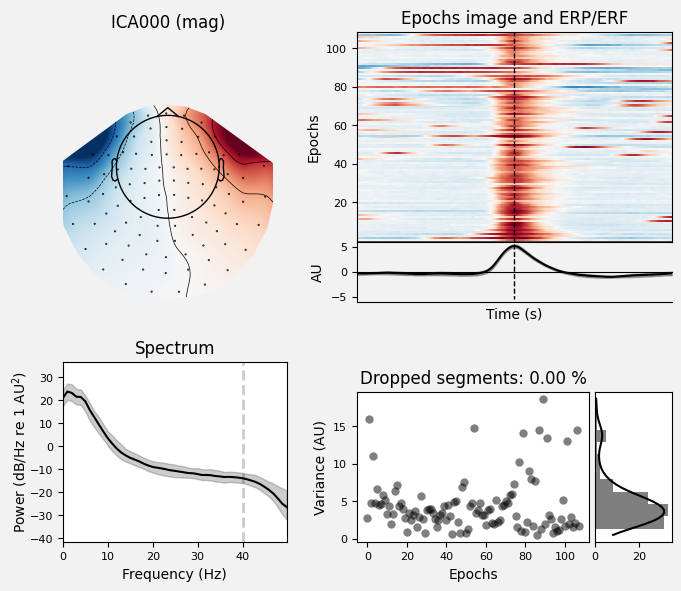

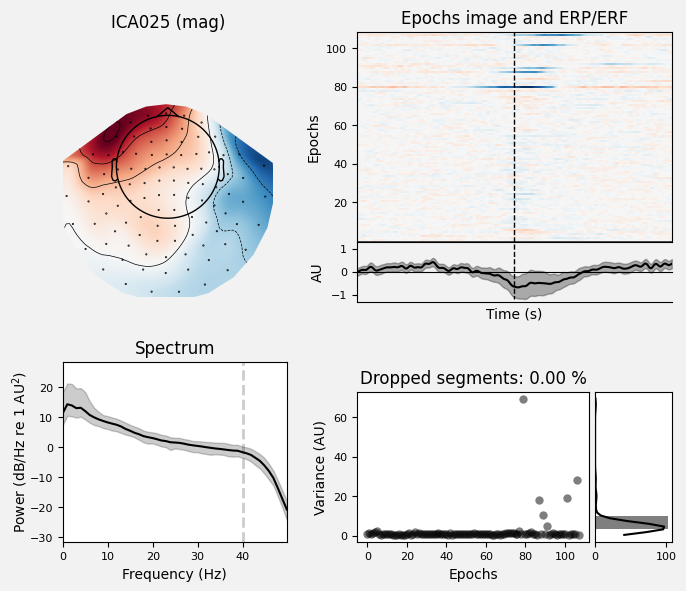

In [65]:
ica.plot_properties(eog_epochs, bads_eog);

Now the important question is how many components one should keep? Tip: some of them don't look like clear artifact patterns. 

The good news is that we don't need to decide __*right*__ now - as you could see the projectors are stored with the data, but inactive at the moment.

BUT: let's repeat this procedure for the ECG, i.e. heart beat artifacts

/tmp/ipykernel_1620364/3637596373.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint(topomap_args=dict(sphere=sphere))


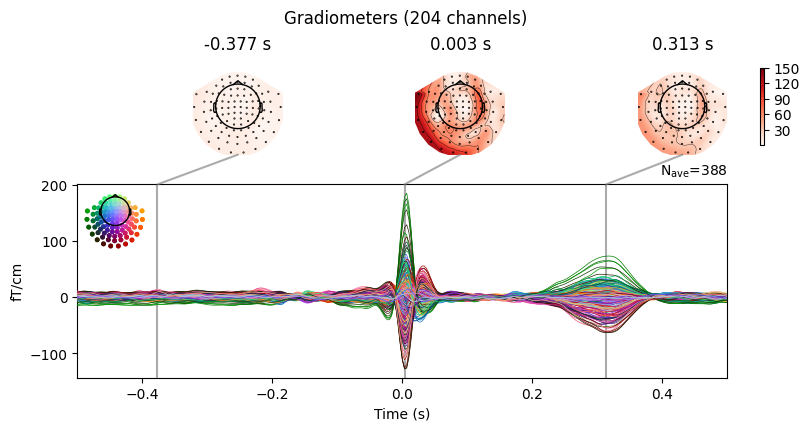

/tmp/ipykernel_1620364/3637596373.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint(topomap_args=dict(sphere=sphere))


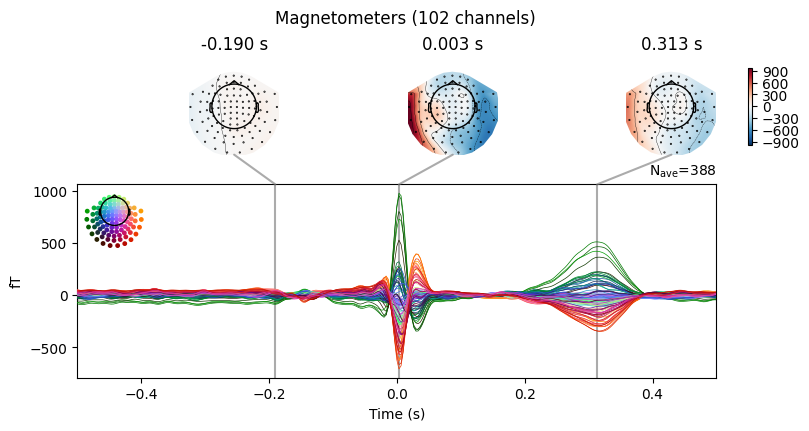

/tmp/ipykernel_1620364/3637596373.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint(topomap_args=dict(sphere=sphere))
/tmp/ipykernel_1620364/3637596373.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ecg_epochs.average().plot_joint(topomap_args=dict(sphere=sphere))


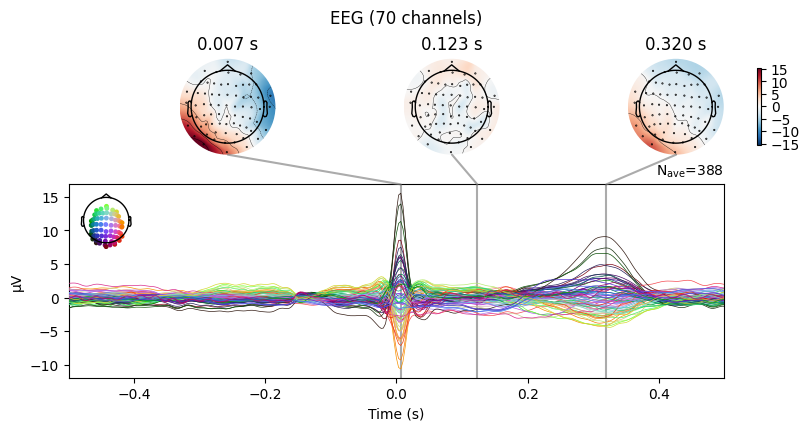

[<Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>,
 <Figure size 800x420 with 6 Axes>]

In [66]:
# same business, same issue for ECG
ecg_epochs = mne.preprocessing.create_ecg_epochs(raw_highpass)
ecg_epochs.average().plot_joint(topomap_args=dict(sphere=sphere))

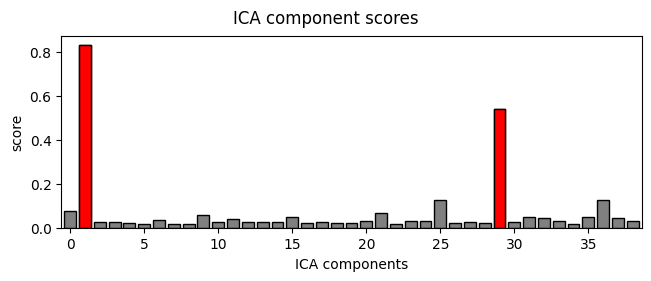

/tmp/ipykernel_1620364/2479923050.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ica.plot_properties(ecg_epochs, bads_ecg);
/tmp/ipykernel_1620364/2479923050.py:3: RuntimeWarning: (X, Y) fit (3.3, 36.9) more than 20 mm from head frame origin
  ica.plot_properties(ecg_epochs, bads_ecg);


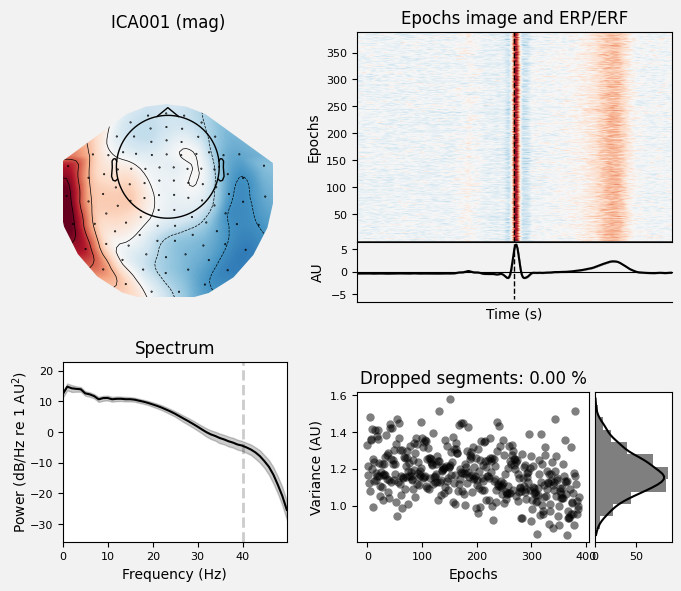

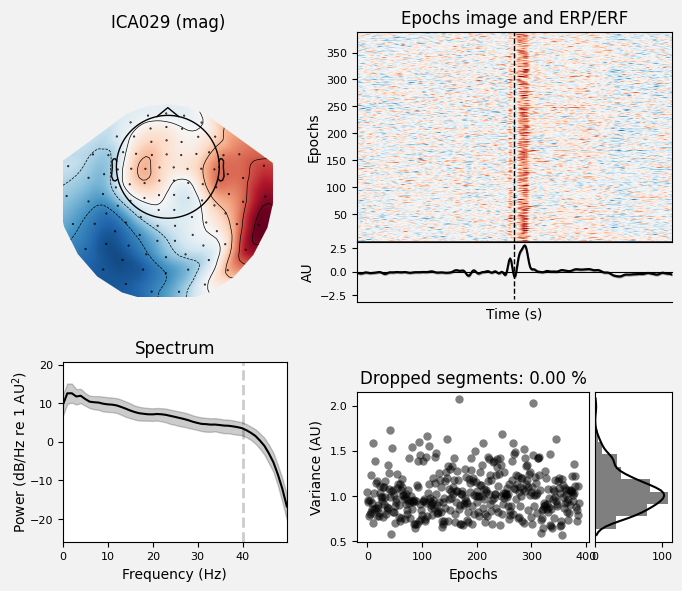

In [67]:
bads_ecg, ecg_scores = ica.find_bads_ecg(raw_highpass)
ica.plot_scores(ecg_scores, bads_ecg);
ica.plot_properties(ecg_epochs, bads_ecg);

We can see that we also face contamination from the cardiac signal... we'll project that out as well.

## Apply ICA and visualize effect

Let's mark the detected EOG and ECG components for removal and apply the ICA to the epoched data.

In [68]:
ica.exclude = bads_eog + bads_ecg
epochs_clean = ica.apply(epochs.copy())

/tmp/ipykernel_1620364/3653093839.py:2: RuntimeWarning: The data you passed to ICA.apply() was baseline-corrected. Please note that ICA can introduce DC shifts, therefore you may wish to consider baseline-correcting the cleaned data again.
  epochs_clean = ica.apply(epochs.copy())


Let's look at one frontal MEG channel before and after applying the ICA:

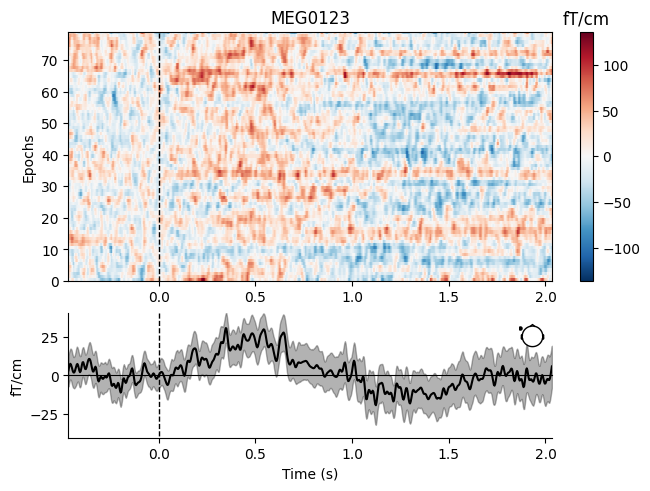

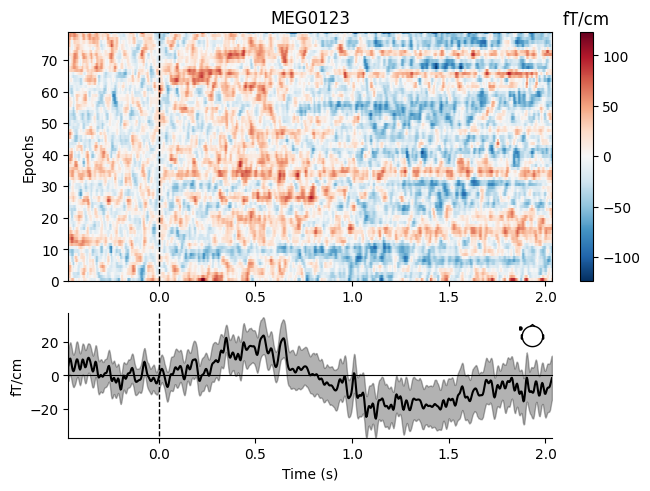

In [69]:
epochs.plot_image(picks='MEG0123', sigma=1.);
epochs_clean.plot_image(picks='MEG0123', sigma=1.);

#### Some thoughts on artifact rejection

We now tackled the artifacts in this data set by computing SSP projections. There are many other ways to do artifact rejection:

- mark artifacts by hand (visual inspection)
- use thresholds (which failed on this dataset!)
- use ICA
- use an automated pipeline, e.g. the <a href="https://autoreject.github.io/">autoreject project</a>
- ...

The best recommendation is: get to know your (raw) data!

## Save Epochs

The standard way is to save the epochs as a `.fif` file together with all the header data. Epochs are saved with the suffix `-epo.fif`.

In [70]:
epochs_fname = raw_fname.replace('_meg.fif', '-epo.fif')  # create the file name
epochs_fname

'./ds000117_pruned/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss-epo.fif'

In [71]:
epochs_clean.save(epochs_fname, overwrite=True) 

[PosixPath('/home/vanvlm1/projects/mne_practical_meeg_2025/ds000117_pruned/derivatives/meg_derivatives/sub-01/ses-meg/meg/sub-01_ses-meg_task-facerecognition_run-01_proc-sss-epo.fif')]

## Bonus: Visualizing epochs data

See [this page](https://mne.tools/stable/auto_tutorials/epochs/20_visualize_epochs.html) for options on how to visualize epochs.

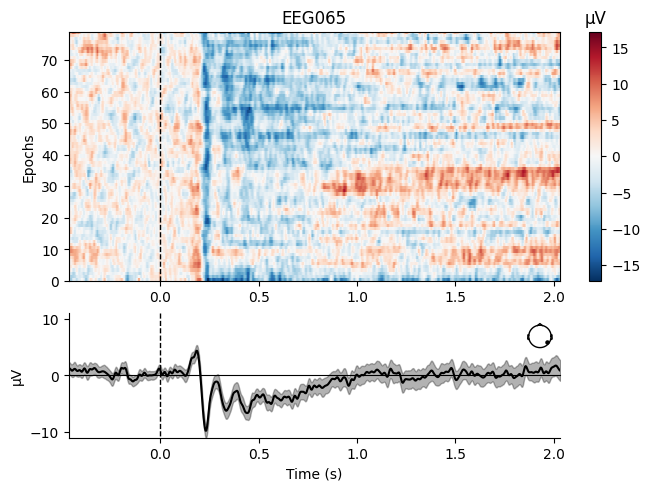

In [72]:
# We have already looked at the epochs in a stacked plot:
epochs_clean.plot_image(picks='EEG065', sigma=1.);

We can also look at the epochs in a data browser window:

In [73]:
%matplotlib qt
epochs_clean.plot();